<H3>Raman curve fit:</H3>
curve fit with 3 lorentz peaks of G, D, G' for CSV text outputs obtained by LabRam HR-800 <br>
2021.08.10 ver.0.1 by fur.    curve fit with LMFIT and shows fitting curves.<br>
2021.08.10 ver.0.11 by fur.    Get G/D area ratio, and G/D height ratio <br>
2021.08.10 ver.0.12 by fur.   File chooser only works for jupyter notebook using ipyfilechooser <br>
2022.09.13 ver.0.13 by fur.   StdErr evaluated in G/D height ratio <br>

<H4>References:<H4>
<OL>
    <LI>LMFIT, https://lmfit.github.io/lmfit-py/</LI>
    <LI>https://sabopy.com/py/lmfit-5/</LI>
    <LI>Multi peak fitting, emilyripka, https://github.com/emilyripka/BlogRepo/blob/master/181119_PeakFitting.ipynb</LI>
</OL>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
from lmfit.lineshapes import lorentzian
from lmfit.models import LinearModel, LorentzianModel

In [3]:
from ipyfilechooser import FileChooser

In [4]:
# Create and displays a FileChooser widget
cwd = os.getcwd()
fc = FileChooser(cwd)
display(fc)

FileChooser(path='/Users/fur/src/git/ramanfit', filename='', title='HTML(value='', layout=Layout(display='none…

In [270]:
#INFILE = "20210726MJ_MWI_28ul_std-D1.txt"

In [271]:
INFILE = fc.selected
INFILE

'/Users/fur/Library/CloudStorage/OneDrive-高知工科大学/work/experiment/raman/20220912/s4_180min_au-x50p02-d1obj50.txt'

In [272]:
# with open(INFILE, "r") as f:
#     print(f.read())

In [273]:
data = np.loadtxt(INFILE, delimiter='\t')

In [274]:
print(data)

[[ 150.       673.81366]
 [ 150.13402  674.29016]
 [ 150.26805  674.37567]
 ...
 [3599.7319   703.03583]
 [3599.866    702.98358]
 [3600.       702.56677]]


In [275]:
x = data[:,0]
y = data[:,1]

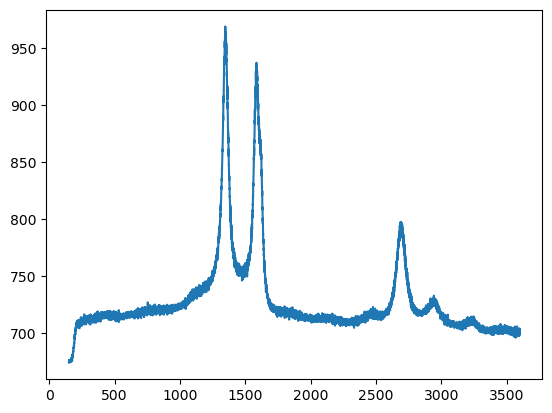

In [276]:
plt.plot(x,y);plt.show()

In [277]:
xDGindex1000=np.searchsorted(x,1000)

In [278]:
xDGindex2000=np.searchsorted(x,2000)

In [279]:
xDG = data[xDGindex1000:xDGindex2000,0]
yDG = data[xDGindex1000:xDGindex2000,1]

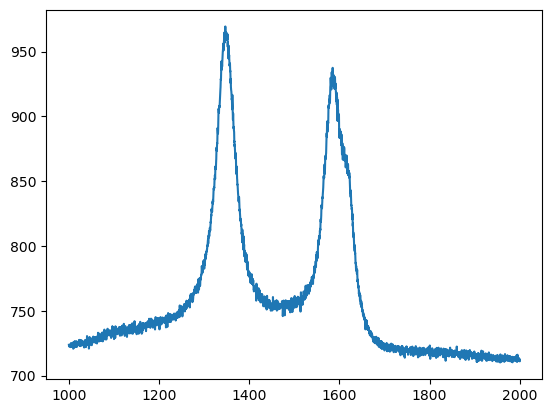

In [280]:
plt.plot(xDG,yDG);plt.show()

In [281]:
# LMFIT

In [282]:
bg = LinearModel(prefix='lin_')
pars = bg.guess(yDG, x=xDG)
#pars

In [283]:
lorentz1 = LorentzianModel(prefix='l1_')
#pars = lorentz1.guess(yDG, x=xDG)
pars.update(lorentz1.make_params())
pars['l1_center'].set(value=1350, min=1300, max=1380)
pars['l1_sigma'].set(value=10, min=5)
pars['l1_amplitude'].set(value=10000, min=5)
#pars

In [284]:
lorentz2 = LorentzianModel(prefix='l2_')
pars.update(lorentz2.make_params())

pars['l2_center'].set(value=1570, min=1520, max=1590)
pars['l2_sigma'].set(value=23, min=5)
pars['l2_amplitude'].set(value=15000, min=5)
#pars

In [285]:
lorentz3 = LorentzianModel(prefix='l3_')
pars.update(lorentz3.make_params())

pars['l3_center'].set(value=1620, min=1600, max=1650)
pars['l3_sigma'].set(value=10, min=5, max=100)
pars['l3_amplitude'].set(value=2000, min=5)
pars

name,value,initial value,min,max,vary,expression
lin_slope,-0.03702339,None,-inf,inf,True,
lin_intercept,814.729562,None,-inf,inf,True,
l1_amplitude,10000.0000,None,5.00000000,inf,True,
l1_center,1350.00000,None,1300.00000,1380.00000,True,
l1_sigma,10.0000000,None,5.00000000,inf,True,
l1_fwhm,20.0000000,None,-inf,inf,False,2.0000000*l1_sigma
l1_height,318.309900,None,-inf,inf,False,"0.3183099*l1_amplitude/max(1e-15, l1_sigma)"
l2_amplitude,15000.0000,None,5.00000000,inf,True,
l2_center,1570.00000,None,1520.00000,1590.00000,True,
l2_sigma,23.0000000,None,5.00000000,inf,True,


In [286]:
mod = lorentz1 + lorentz2 + lorentz3 + bg
init = mod.eval(pars, x=xDG)
out = mod.fit(yDG, pars, x=xDG)

In [287]:
print(out.fit_report())

[[Model]]
    (((Model(lorentzian, prefix='l1_') + Model(lorentzian, prefix='l2_')) + Model(lorentzian, prefix='l3_')) + Model(linear, prefix='lin_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 232
    # data points      = 7461
    # variables        = 11
    chi-square         = 193479.211
    reduced chi-square = 25.9703639
    Akaike info crit   = 24311.1409
    Bayesian info crit = 24387.2328
[[Variables]]
    lin_slope:     -0.02147265 +/- 2.1853e-04 (1.02%) (init = -0.03702339)
    lin_intercept:  753.476083 +/- 0.34499509 (0.05%) (init = 814.7296)
    l1_amplitude:   20543.7738 +/- 44.9974945 (0.22%) (init = 10000)
    l1_center:      1348.04070 +/- 0.04883834 (0.00%) (init = 1350)
    l1_sigma:       28.3953684 +/- 0.07792125 (0.27%) (init = 10)
    l1_fwhm:        56.7907368 +/- 0.15584251 (0.27%) == '2.0000000*l1_sigma'
    l1_height:      230.294128 +/- 0.39632407 (0.17%) == '0.3183099*l1_amplitude/max(1e-15, l1_sigma)'
    l2_amplitude:   1

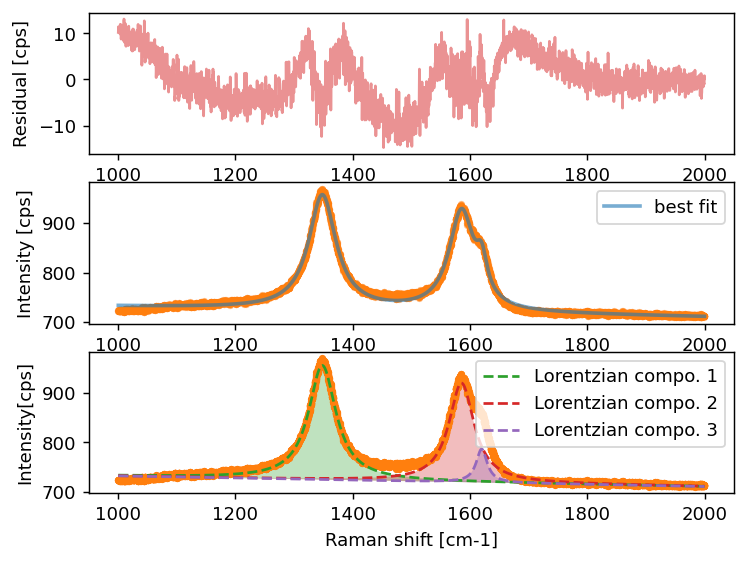

In [288]:
fig, ax = plt.subplots(3,1,dpi=130)
ax=ax.ravel()

ax[0].plot(xDG, out.best_fit - yDG, 'C3-', alpha=0.5)

ax[1].plot(xDG, yDG, 'C1.',alpha=0.5)
ax[1].plot(xDG, out.best_fit, '-', label='best fit',zorder=10,lw=2, alpha=0.6)

ax[2].plot(xDG, yDG, 'C1.')
comps = out.eval_components(x=xDG)
ax[2].plot(xDG, comps['l1_']+comps['lin_'], 'C2--', label='Lorentzian compo. 1')
ax[2].fill_between(xDG, comps['l1_']+comps['lin_'], comps['lin_'],facecolor='C2',alpha=0.3)
ax[2].plot(xDG, comps['l2_']+comps['lin_'], 'C3--', label='Lorentzian compo. 2')
ax[2].fill_between(xDG, comps['l2_']+comps['lin_'], comps['lin_'],facecolor='C3',alpha=0.3)
ax[2].plot(xDG, comps['l3_']+comps['lin_'], 'C4--', label='Lorentzian compo. 3')
ax[2].fill_between(xDG, comps['l3_']+comps['lin_'], comps['lin_'],facecolor='C4',alpha=0.3)

ax[0].set(xlabel="",ylabel="Residual [cps]")
ax[1].set(xlabel="",ylabel="Intensity [cps]")
ax[2].set(xlabel="Raman shift [cm-1]",ylabel="Intensity[cps]")
ax[1].legend(loc='best')
ax[2].legend(loc='best')

plt.savefig("ramfit.png",dpi=130)
plt.show()

In [289]:
for parname, param in out.params.items():
    print("%s = %f +/- %f " % (parname, param.value, param.stderr))

lin_slope = -0.021473 +/- 0.000219 
lin_intercept = 753.476083 +/- 0.344995 
l1_amplitude = 20543.773828 +/- 44.997494 
l1_center = 1348.040704 +/- 0.048838 
l1_sigma = 28.395368 +/- 0.077921 
l1_fwhm = 56.790737 +/- 0.155843 
l1_height = 230.294128 +/- 0.396324 
l2_amplitude = 16382.101972 +/- 93.701789 
l2_center = 1585.470670 +/- 0.104490 
l2_sigma = 26.079336 +/- 0.128702 
l2_fwhm = 52.158672 +/- 0.257404 
l2_height = 199.950845 +/- 0.531205 
l3_amplitude = 2413.060790 +/- 65.778670 
l3_center = 1619.890900 +/- 0.129582 
l3_sigma = 11.387712 +/- 0.254573 
l3_fwhm = 22.775425 +/- 0.509147 
l3_height = 67.449995 +/- 0.841540 


In [290]:
od=out.params

In [291]:
l1_height_stderr=od['l1_height'].stderr

In [292]:
l2_height_stderr=od['l2_height'].stderr

In [293]:
vd = out.params.valuesdict()

In [294]:
#vd

In [295]:
l2_area = np.pi * vd['l2_amplitude'] * vd['l2_fwhm']

In [296]:
l1_area = np.pi * vd['l1_amplitude'] * vd['l1_fwhm']

In [297]:
GDAreaRatio = l2_area / l1_area

In [298]:
GDAreaRatio

0.73238327915553

In [299]:
l1_height = vd['l1_height']

In [300]:
l2_height = vd['l2_height']

In [301]:
GDHeightRatio = l2_height / l1_height

In [302]:
GDHeightRatio

0.868241177608052

In [303]:
GDHeightRatioMax = (l2_height + l2_height_stderr) / (l1_height - l1_height_stderr)

In [304]:
GDHeightRatioMin = (l2_height - l2_height_stderr) / (l1_height + l1_height_stderr)

In [305]:
GDHeightRatioPlus = GDHeightRatioMax - GDHeightRatio

In [306]:
GDHeightRatioMinus = GDHeightRatio - GDHeightRatioMin

In [307]:
GDHeightRatioPlus

0.0038073858216340906

In [308]:
GDHeightRatioMinus

0.003794303714200198